<H1> Resultado das eleições municipais - Salinas(MG) 2024 </H1>

Apenas um detalhamento dos votos por seção e local de votação. 

<H2> Resultados da eleição de prefeito </H2>
<p> Obs: Os votos para Anderson Brito foram computados como nulos no resultado final. </p>

In [424]:
import pandas as pd
import numpy as np

# LE DADOS
df = pd.read_csv("prefeito-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
pd.set_option('display.max_rows', len(df) + 1)

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df[["LOCAL", "CANDIDATO", "VOTOS"]].groupby(by=["LOCAL", "CANDIDATO"]).sum()

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

dg["TOTAL"] = dg.sum(axis=1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)


<h3> Resultados agrupados por local de votação </h3>

In [425]:
# MOSTRA TABELA
display(dg)

,ANDERSON BRITO,BENONI,KINCA DIAS,TOTAL
LOCAL,,,,
AMUSA,5,21,52,78
Associação Barreiros,4,8,41,53
Associação Boqueirão Baixo,4,2,40,46
Associação Boqueirão Medio,19,9,32,60
Associação Caiçara,0,31,26,57
Associação Corrego da Empoeira,7,21,48,76
Associação Pinhãozeiro,3,9,30,42
Associação Rural Rio das Antas,11,26,122,159
Associação Rural da Barra do Rio,2,5,105,112


<Axes: xlabel='LOCAL'>

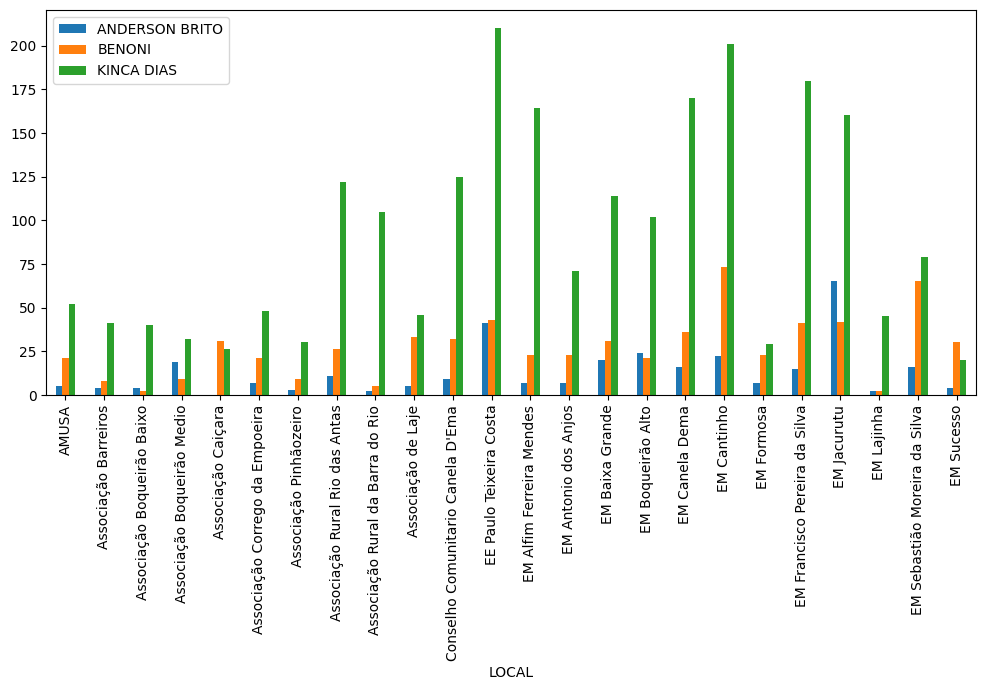

In [426]:
dg_locais_pequenos = dg[dg["TOTAL"] < 300].copy(deep=True)
dg_locais_pequenos.drop(columns=dg.columns[-1],  axis=1,  inplace=True)
dg_locais_pequenos[0:-1].plot(kind='bar', figsize=(12, 5))

<Axes: xlabel='LOCAL'>

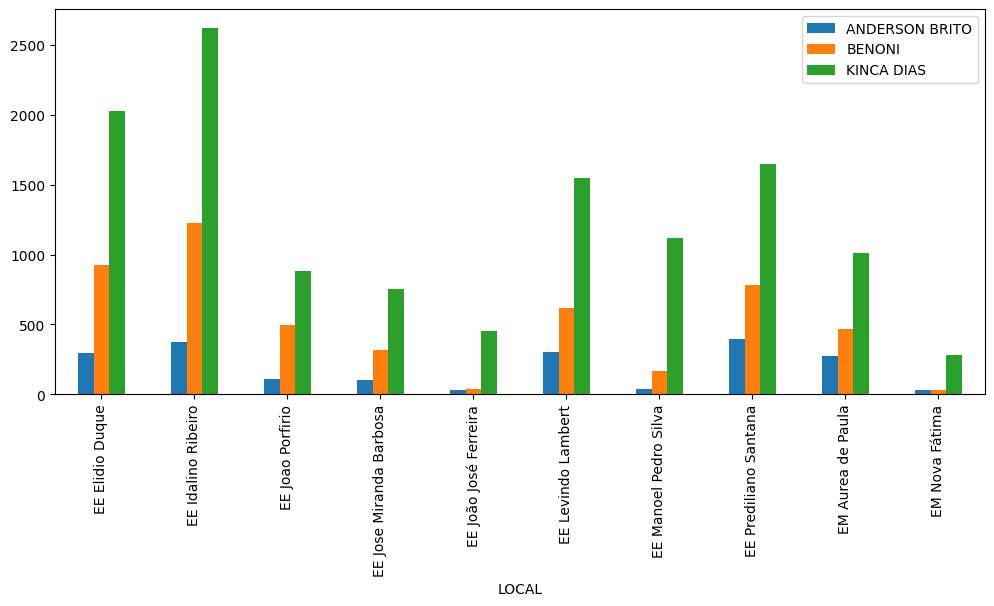

In [427]:
dg_locais_grandes = dg[dg["TOTAL"] >= 300].copy(deep=True)
dg_locais_grandes.drop(columns=dg.columns[-1],  axis=1,  inplace=True)
dg_locais_grandes[0:-1].plot(kind='bar', figsize=(12, 5))

In [429]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df.groupby(by=["LOCAL", "CANDIDATO", "SECAO"]).sum()

# CRIA UM AGRUPAMENTO SEM A SEÇÃO
dg1 = dg.groupby(["LOCAL", "CANDIDATO"]).sum()

# CRIA UM INDICE DO AGRUPAMENTO SUBSTITUINDO A SECAO POR TOTAL 
dg1.index = [dg1.index.get_level_values(0),
             dg1.index.get_level_values(1),
             ['Total'] * len(dg1)]

# INSERE AS LINHAS COM O INDICE "TOTAL" NA TABELA ORIGINAL E ORDENA POR LOCAL E CANDIDATO
dg = pd.concat([dg, dg1]).sort_index(level=[0,1])

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-3, -1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values / 2

# RENOMEIA CABECALHO DA COLUNA DE INDICES
dg.index.names = ["LOCAL", "SECAO"]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)


<H3> Resultados detalhados por seção </H3>

In [430]:
# MOSTRA TABELA
display(dg)

ANDERSON BRITO  BENONI  KINCA DIAS
LOCAL                             SECAO                                    
AMUSA                             239                 5      21          52
                                  Total               5      21          52
Associação Barreiros              143                 4       8          41
                                  Total               4       8          41
Associação Boqueirão Baixo        256                 4       2          40
                                  Total               4       2          40
Associação Boqueirão Medio        59                 19       9          32
                                  Total              19       9          32
Associação Caiçara                168                 0      31          26
                                  Total               0      31          26
Associação Corrego da Empoeira    145                 7      21          48
                                  Total               7      21          48
Associação Pinhãozeiro            158                 3       9          30
                                  Total               3       9          30
Associação Rural Rio das Antas    247                11      26         122
                                  Total              11      26         122
Associação Rural da Barra do Rio  164                 2       5         105
                                  Total               2       5         105
Associação de Laje                236                 5      33          46
                                  Total               5      33          46
Conselho Comunitario Canela D'Ema 220                 9      32         125
                                  Total               9      32         125
EE Elidio Duque                   22                 22      77         143
                                  23                 28      64         170
                                  24                 27      85         153
                                  25                 24      67         174
                                  109                31      78         171
                                  115                18      69         168
                                  119                30      85         155
                                  131                36      74         166
                                  186                20      78         157
                                  206                21      86         173
                                  238                27      61         182
                                  261                13      87         184
                                  268                 2      16          31
                                  Total             299     927        2027
EE Idalino Ribeiro                26                 25      79         163
                                  27                 24      79         147
                                  28                 22      82         157
                                  29                 21      81         171
                                  30                 23      83         151
                                  39                 25      65         170
                                  40                 21      65         155
                                  41                 28      70         173
                                  102                23      80         153
                                  104                25      75         163
                                  108                29      74         177
                                  110                28      58         177
                                  134                24      76         178
                                  254                12      83         168
                                  258                26      80         141
             

<H2> Resultados da eleição de vereador </H2>
<p> Obs: Os dados sobre coligação/federação/partidos são facilmente cosultáveis <a href="https://resultados.tse.jus.br/oficial/app/index.html#/divulga/votacao-de-partidos;e=619;cargo=13;uf=mg;mu=51390"> aqui </a>. Nessa tabela a intenção é apenas mostrar a votação em cada local. </p>
<p> Na coluna seção aparece todas as seções em que o candidato foi votado em um lugar (para locais com mais de uma seção eleitoral) </p>

<H3> Resultados agrupados por candidato </H3>

In [26]:
# LE DADOS
df = pd.read_csv("vereador-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
numero_candidatos = len(df["CANDIDATO"].unique())
pd.set_option('display.max_rows', len(df) + 1)
pd.set_option('display.max_columns', numero_candidatos + 1)

df["SECAO"] = df["SECAO"].apply(lambda x : str(x) + " ")

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["CANDIDATO"]).apply(lambda x : x.groupby(by=["LOCAL"]).sum()\
                                         .sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# MOSTRA TABELA
display(dfg)

SECAO  \
CANDIDATO                      LOCAL                                                                                  
ADEMIR PEDREIRO                EE Idalino Ribeiro                                     28 39 41 104 108 134 254 262    
                               EE Levindo Lambert                                           44 45 46 48 49 111 117    
                               EE Jose Miranda Barbosa                                               42 43 116 123    
                               EE Elidio Duque                                                      25 131 186 261    
                               EM Canela Dema                                                                  144    
                               EE Joao Porfirio                                                                 36    
                               EM Francisco Pereira da Silva                                                    88    
                               EE Prediliano Santana                                                       121 132    
                               Associação Boqueirão Medio                                                       59    
                               Associação Caiçara                                                              168    
                               Associação de Laje                                                              236    
                               EM Aurea de Paula                                                               190    
                               EM Baixa Grande                                                                  56    
                               EM Cantinho                                                                      62    
AGNELO MEDINA                  EM Aurea de Paula                                               146 190 214 228 245    
                               EE Prediliano Santana                                               118 187 237 260    
                               EE Levindo Lambert                                                           47 122    
                               EE Joao Porfirio                                                           33 34 36    
                               EE Idalino Ribeiro                                                           29 104    
                               EE Elidio Duque                                                                 131    
                               Associação Barreiros                                                            143    
                               EM Nova Fátima                                                                   76    
ALAN MIRANDA                   EM Aurea de Paula                                       146 174 190 214 228 245 266    
                               EE Prediliano Santana                           121 132 187 212 237 252 257 260 267    
                               EE Levindo Lambert                                    44 45 46 47 48 49 111 122 264    
                               EE Idalino Ribeiro                              27 28 29 39 104 108 110 134 254 262    
                               EM Antonio dos Anjos                                                             60    
                               EE Joao Porfirio                                                        31 35 36 37    
                               EE Elidio Duque                                                      23 109 206 261    
                               EE Jose Miranda Barbosa                                                      42 123    
                               EE Manoel Pedro Silva                                                         92 94    
                               Associação Barreiros                                                            143    
                               AMUSA                            

<H3> Resultados agrupados por local </h3>

In [23]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["LOCAL"]).apply(lambda x : x.groupby(by=["CANDIDATO"])\
                                     .sum().sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# MOSTRA TABELA
display(dfg)

SECAO  \
LOCAL                             CANDIDATO                                                                           
AMUSA                             MARCELO PETRONE                                                              239    
                                  EILTON SANTIAGO                                                              239    
                                  CARLIM                                                                       239    
                                  JOÃO LUIZ DE NEGÃO                                                           239    
                                  JUNIO BARBOSA                                                                239    
                                  MOREIRA                                                                      239    
                                  PRISCILA MATOS                                                               239    
                                  TIÃO DE OLEGARIO                                                             239    
                                  JUNIOR GARÇOM                                                                239    
                                  MARIA CLARA                                                                  239    
                                  CLEYTON GARDENAL                                                             239    
                                  MARINA SANTANA                                                               239    
                                  THIAGO DURÃES                                                                239    
                                  DORINHA                                                                      239    
                                  LEILIANE PROFESSORA                                                          239    
                                  TAZINHA                                                                      239    
                                  LETICIA ASSISTENTE SOCIAL                                                    239    
                                  ZEZINHO DO SALÃO                                                             239    
                                  EDSON MIRANDA                                                                239    
                                  CLAUDINHA                                                                    239    
                                  ALAN MIRANDA                                                                 239    
                                  JARBINHAS                                                                    239    
                                  JOÃO PELA                                                                    239    
                                  KÉSLEY                                                                       239    
                                  ESTÉ DO BRIGADEIRO                                                           239    
                                  ERIC ERLON                                                                   239    
                                  FABIO SOUZA                                                                  239    
                                  HENILTON IMÓVEIS                                                             239    
                                  JADSON                                                                       239    
                                  MAURICIO COSTA                                                               239    
                                  NILO DO TAXI                                                                 239    
                                  NADIA FRANCO                                                                 239    
                                  MESSIAS                       